# Crossref Citation Stats

## Data Provenance

The data was retrieved in September 2017 via the [Crossref API](http://api.crossref.org/works) (the download was interrupted and resumed a few times). (The raw responses LZMA zipped take about 28 GB disk space)

## Data Preprocessing

The data was then preprocessed to get calculate some high level stats over the data which are then analysed in this notebook.

The files are available here:
* [crossref-works-summaries-stat.tsv](https://storage.googleapis.com/elife-ml/citations/crossref-works-summaries-stat.tsv) - Overall summary stats
* [crossref-works-summaries-by-type-and-publisher-stat.tsv.gz](https://storage.googleapis.com/elife-ml/citations/crossref-works-summaries-by-type-and-publisher-stat.tsv.gz) - Summary stats grouped by _type_ and _publisher_ 
* [crossref-works-citations-stat.tsv](https://storage.googleapis.com/elife-ml/citations/crossref-works-citations-stat.tsv) - Stats relating to reference data quality and cleaning
* [crossref-works-citations.tsv.gz](https://storage.googleapis.com/elife-ml/citations/crossref-works-citations.tsv.gz) - Stats relating to open access (oa) references

## Notes

The *reference\_count* and *referenced\_by\_count* are counts provided by Crossref. *num\_references* are the number of references that are actually accessible via the API (i.e. oa).

## Scripts

The scripts can be found in the repository, see [README](../README.md). Using those scripts the data can be updated (but it will take some time to retrieve all of the Crossref data).

In [1]:
%matplotlib inline

In [2]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [3]:
plt.style.use('ggplot')

In [4]:
data_path = '../data'
summary_stats_filename = 'crossref-works-summaries-stat.tsv'
summary_by_type_and_publisher_stats_filename = 'crossref-works-summaries-by-type-and-publisher-stat.tsv.gz'
citations_stats_filename = 'crossref-works-citations-stat.tsv'
reference_stats_filename = 'crossref-works-reference-stat.tsv.gz'

In [5]:
df_summary = pd.read_csv(os.path.join(data_path, summary_stats_filename), sep='\t')
df_summary = df_summary.rename(columns={'Unnamed: 0': 'stat'}).set_index('stat')
df_summary

,doi,title,reference_count,referenced_by_count,created,type,publisher,container_title,author_count,first_subject_area,subject_areas,has_references,num_references,num_citations_without_doi,num_duplicate_citation_dois,cited_dois,provenance,debug
stat,,,,,,,,,,,,,,,,,,
count,93184372.0,89128522.0,9.318437e+07,9.318437e+07,93184372.0,93183607.0,93182360.0,88397826.0,7.731770e+07,58607144.0,58607144.0,9.318437e+07,9.318437e+07,9.318437e+07,9.318437e+07,93184372.0,93184372.0,93184372.0
count_non_zero,NaN,NaN,3.844524e+07,3.921046e+07,NaN,NaN,NaN,NaN,7.731770e+07,NaN,NaN,1.822864e+07,1.822864e+07,1.684190e+07,3.859240e+05,NaN,NaN,NaN
count_zero,NaN,NaN,5.473914e+07,5.397391e+07,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,7.495573e+07,7.495573e+07,7.634247e+07,9.279845e+07,NaN,NaN,NaN
max,NaN,NaN,2.581400e+04,1.291330e+05,NaN,NaN,NaN,NaN,9.148000e+03,NaN,NaN,1.000000e+00,7.034000e+03,6.307000e+03,1.335000e+03,NaN,NaN,NaN
mean,NaN,NaN,1.153770e+01,7.964879e+00,NaN,NaN,NaN,NaN,3.163217e+00,NaN,NaN,1.956190e-01,5.614687e+00,2.614254e+00,1.165767e-02,NaN,NaN,NaN
mean_non_zero,NaN,NaN,2.796533e+01,1.892868e+01,NaN,NaN,NaN,NaN,3.163217e+00,NaN,NaN,1.000000e+00,2.870215e+01,1.446438e+01,2.814837e+00,NaN,NaN,NaN
min,NaN,NaN,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,1.000000e+00,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN
sum,NaN,NaN,1.075134e+09,7.422023e+08,NaN,NaN,NaN,NaN,2.445727e+08,NaN,NaN,1.822864e+07,5.232011e+08,2.436076e+08,1.086313e+06,NaN,NaN,NaN


In [6]:
df_citations = pd.read_csv(os.path.join(data_path, citations_stats_filename), sep='\t')
df_citations = df_citations.rename(columns={'Unnamed: 0': 'stat'}).set_index('stat')
boolean_str_to_int_map = {'True': '1', 'False': '0'}
print(df_citations['cited_doi_corrected']
    .map(lambda x: boolean_str_to_int_map.get(x, x)).values)
df_citations['cited_doi_corrected'] = pd.to_numeric(
    df_citations['cited_doi_corrected']
    .map(lambda x: boolean_str_to_int_map.get(x, x))
)
print(df_citations.dtypes)
df_citations

['357115084' '76562655' '280552429' '1' '0' '76562655']
citing_doi                             float64
cited_doi                              float64
original_cited_doi                     float64
cited_doi_valid                        float64
cited_doi_corrected                      int64
doi_corrected_equal_case_insensitve    float64
dtype: object


,citing_doi,cited_doi,original_cited_doi,cited_doi_valid,cited_doi_corrected,doi_corrected_equal_case_insensitve
stat,,,,,,
count,357115084.0,2.464016e+08,2.464016e+08,278504990.0,357115084,76562655.0
count_non_zero,NaN,6.830000e+02,6.830000e+02,278178058.0,76562655,76448579.0
count_zero,NaN,0.000000e+00,0.000000e+00,326932.0,280552429,114076.0
max,NaN,1.077630e+01,1.077630e+01,1.0,1,1.0
min,NaN,1.010017e+01,1.010017e+01,0.0,0,0.0
sum,NaN,6.928239e+03,6.928239e+03,278178058.0,76562655,76448579.0


In [7]:
df_summary['reference_count']['count']

93184372.0

In [8]:
DEFAULT_NUMBER_FORMAT = '{:,.0f}'
format_count = lambda c, number_format=DEFAULT_NUMBER_FORMAT: number_format.format(c)

def show_counts(counts, title='', number_format=DEFAULT_NUMBER_FORMAT, **kwargs):
    if isinstance(counts, list):
        df = pd.DataFrame(counts, columns=['what', 'count']).set_index('what')
    else:
        df = counts
    ax = df.plot(kind='bar', **kwargs)
    for p in ax.patches:
        ax.annotate(
            format_count(p.get_height(), number_format=number_format),
            xy=(p.get_x() + p.get_width() / 2, p.get_height()), xycoords="data",
            va="bottom", ha="center"
        )
    ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: format_count(y))) 
    ax.axes.get_xaxis().set_label_text(title)
    ax.margins(y=0.2)

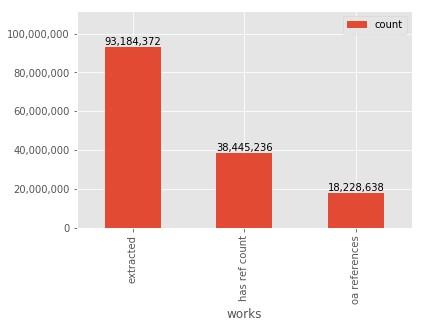

In [9]:
show_counts([
    ['extracted', df_summary['has_references']['count']],
    ['has ref count', df_summary['reference_count']['count_non_zero']],
    ['oa references', df_summary['has_references']['count_non_zero']]
], 'works')

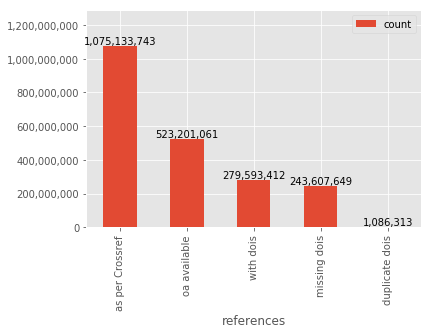

In [10]:
show_counts([
    ['as per Crossref', df_summary['reference_count']['sum']],
    ['oa available', df_summary['num_references']['sum']],
    ['with dois', df_summary['num_references']['sum'] - df_summary['num_citations_without_doi']['sum']],
    ['missing dois', df_summary['num_citations_without_doi']['sum']],
    ['duplicate dois', df_summary['num_duplicate_citation_dois']['sum']]
], 'references')

num_cited_doi_not_corrected: 280552429
num_corrected_doi_same_case_insensitve: 76448579


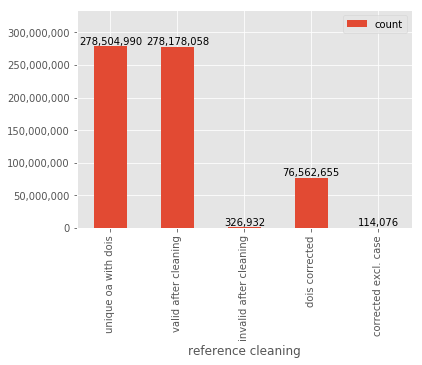

In [11]:
num_unique_oa_with_dois = df_citations['cited_doi_valid']['count']
num_cited_doi_corrected = df_citations['cited_doi_corrected']['count_non_zero']
num_cited_doi_not_corrected = df_citations['cited_doi_corrected']['count_zero']
#num_doi_same_case_insensitve = df_citations['doi_same_case_insensitve']['count_non_zero']
num_corrected_doi_same_case_insensitve = int(df_citations['doi_corrected_equal_case_insensitve']['count_non_zero'])
print('num_cited_doi_not_corrected:', num_cited_doi_not_corrected)
print('num_corrected_doi_same_case_insensitve:', num_corrected_doi_same_case_insensitve)
show_counts([
    ['unique oa with dois', num_unique_oa_with_dois],
    ['valid after cleaning', df_citations['cited_doi_valid']['count_non_zero']],
    ['invalid after cleaning', num_unique_oa_with_dois - df_citations['cited_doi_valid']['count_non_zero']],
    ['dois corrected', df_citations['cited_doi_corrected']['count_non_zero']],
    ['corrected excl. case', (
        num_cited_doi_corrected - num_corrected_doi_same_case_insensitve
    )]
], 'reference cleaning')

In [12]:
df_reference_stat = pd.read_csv(os.path.join(data_path, reference_stats_filename), sep='\t')
df_reference_stat['examples'] = df_reference_stat['examples'].map(lambda x: json.loads(x))
df_reference_stat['examples_without_source'] = df_reference_stat['examples'].map(lambda x: [y[1] for y in x])
df_reference_stat = df_reference_stat.sort_values('count', ascending=False)
df_reference_stat.drop('examples', axis=1).head(10)

,type,key,count,examples_without_source
0,key_combination,author|first-page|journal-title|key|volume|year,53296226,"[{'first-page': '2151', 'volume': '7', 'year':..."
773032,year,NaN,42784822,[{'unstructured': 'International Classificatio...
1,key_combination,key|unstructured,36339151,[{'unstructured': 'Darvari R Controlled releas...
2,key_combination,author|first-page|journal-title|key|unstructur...,35619838,"[{'first-page': '741', 'volume': '7,', 'year':..."
691062,total_first_subject_area,NaN,34542764,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
3,key_combination,author|key|volume-title|year,27172493,"[{'author': 'Paxinos', 'key': '10.1002/(SICI)1..."
4,key_combination,article-title|author|first-page|journal-title|...,24229691,"[{'first-page': '1291', 'article-title': 'Anti..."
725872,total_publisher,Elsevier BV,15261805,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
78859,non_oa_ref-publisher,Elsevier BV,10212958,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
5,key_combination,author|key|unstructured|volume-title|year,9434933,"[{'author': 'Crowe', 'unstructured': '1956. Mu..."


In [13]:
set(df_reference_stat['type'].values)

{'key_combination',
 'non_oa_ref-countainer_title',
 'non_oa_ref-created',
 'non_oa_ref-first_subject_area',
 'non_oa_ref-publisher',
 'total_countainer_title',
 'total_created',
 'total_first_subject_area',
 'total_publisher',
 'year'}

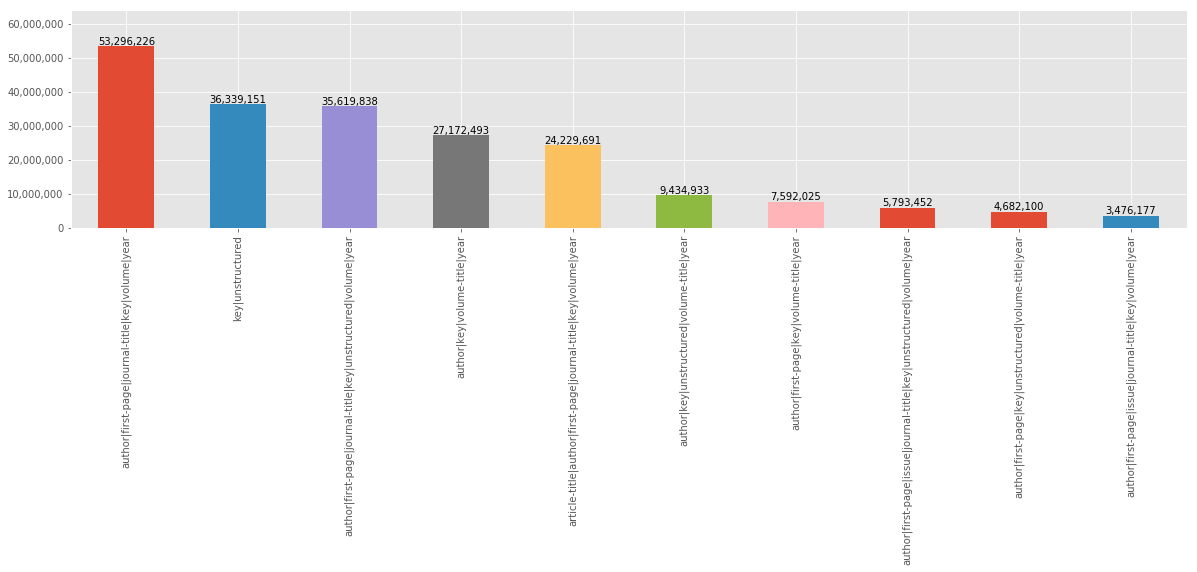

In [14]:
df_reference_key_combination_stat = (
    df_reference_stat[df_reference_stat['type'] == 'key_combination']
    .drop('type', axis=1)
    .set_index('key')
)
show_counts(df_reference_key_combination_stat['count'].head(10), figsize=(20, 4))

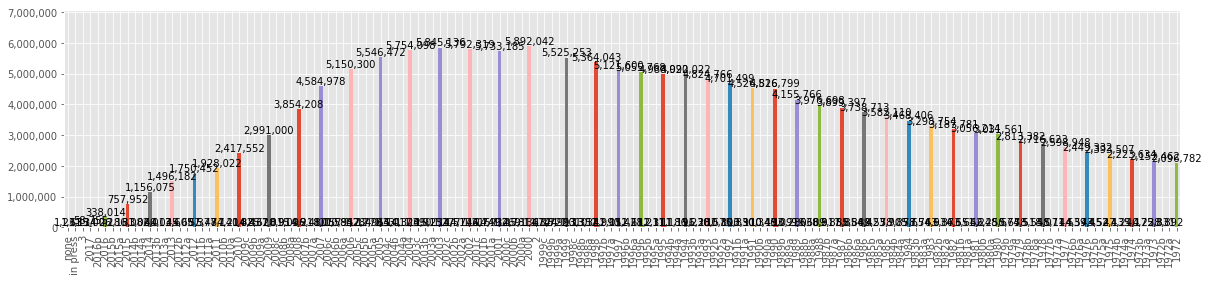

In [15]:
df_reference_year_stat = (
    df_reference_stat[df_reference_stat['type'] == 'year']
    .drop('type', axis=1)
    .sort_values('key', ascending=False)
    .set_index('key')
)
df_reference_year_stat = df_reference_year_stat[df_reference_year_stat['count'] > 1000]
show_counts(df_reference_year_stat['count'].head(150), figsize=(20, 4))

key
Elsevier BV                                                 0.669184
IEEE                                                        0.877467
Institute of Electrical and Electronics Engineers (IEEE)    0.682281
Elsevier                                                    0.552089
Ovid Technologies (Wolters Kluwer Health)                   0.334618
IOP Publishing                                              0.779924
Oxford University Press (OUP)                               0.222874
American Chemical Society (ACS)                             0.280850
Pleiades Publishing Ltd                                     0.963177
The Optical Society                                         0.806826
Name: count, dtype: float64


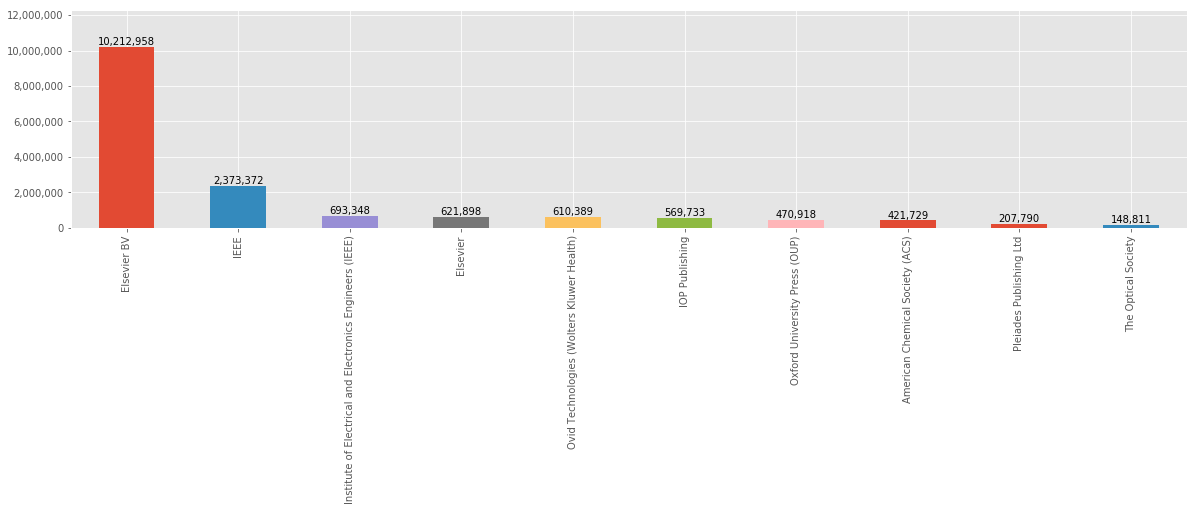

In [16]:
df_temp = (
    df_reference_stat[df_reference_stat['type'] == 'non_oa_ref-publisher']
    .drop('type', axis=1)
    .set_index('key')
)

df_temp_total = (
    df_reference_stat[df_reference_stat['type'] == 'total_publisher']
    .drop('type', axis=1)
    .set_index('key')
)
# print(df_temp_total.head())
print((df_temp['count'].head(10) / df_temp_total['count']).dropna())
show_counts(df_temp['count'].head(10), figsize=(20, 4))

key
Pleiades Publishing Ltd    0.963177
IEEE                       0.877467
Mary Ann Liebert Inc       0.823168
The Optical Society        0.806826
IOP Publishing             0.779924
Name: count, dtype: float64


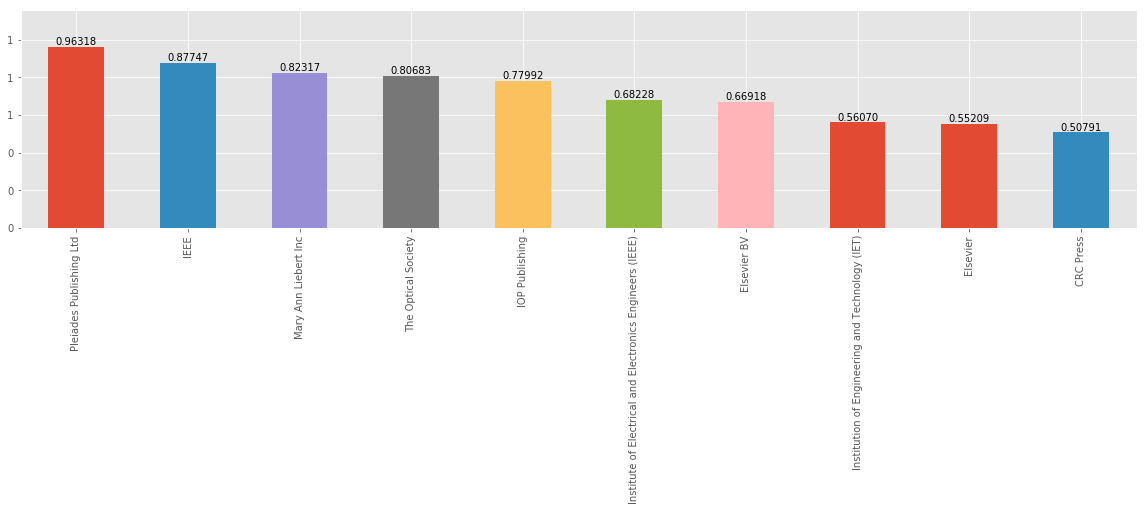

In [17]:
df_temp = (
    df_reference_stat[df_reference_stat['type'] == 'non_oa_ref-publisher']
    .drop('type', axis=1)
    .set_index('key')
)
df_temp2 = (
    df_reference_stat[df_reference_stat['type'] == 'total_publisher']
    .drop('type', axis=1)
    .set_index('key')
)
df_temp = df_temp[df_temp['count'] > 100000]
# df_temp = df_temp[df_temp2['count'] > 10000]
# df_temp2 = df_temp2[df_temp2['count'] > 10000]
df_temp3 = df_temp.copy()
df_temp3['count'] = df_temp3['count'] / df_temp2['count']
print(df_temp3['count'].sort_values(ascending=False).head())
show_counts(df_temp3['count'].sort_values(ascending=False).head(10), number_format='{:,.5f}', figsize=(20, 4))

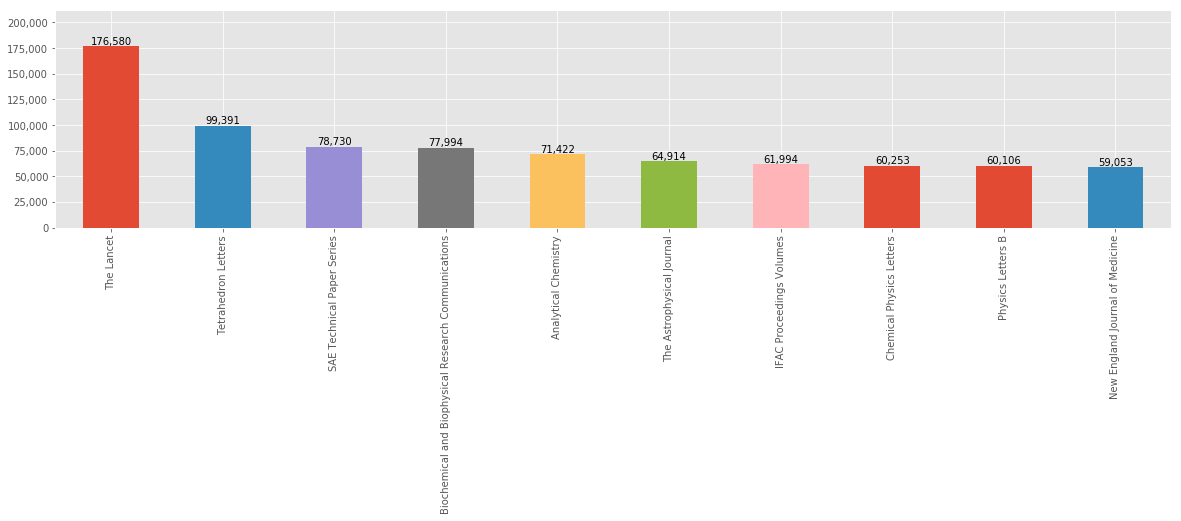

In [18]:
df_temp = (
    df_reference_stat[df_reference_stat['type'] == 'non_oa_ref-countainer_title']
    .drop('type', axis=1)
    .set_index('key')
)
show_counts(df_temp['count'].head(10), figsize=(20, 4))

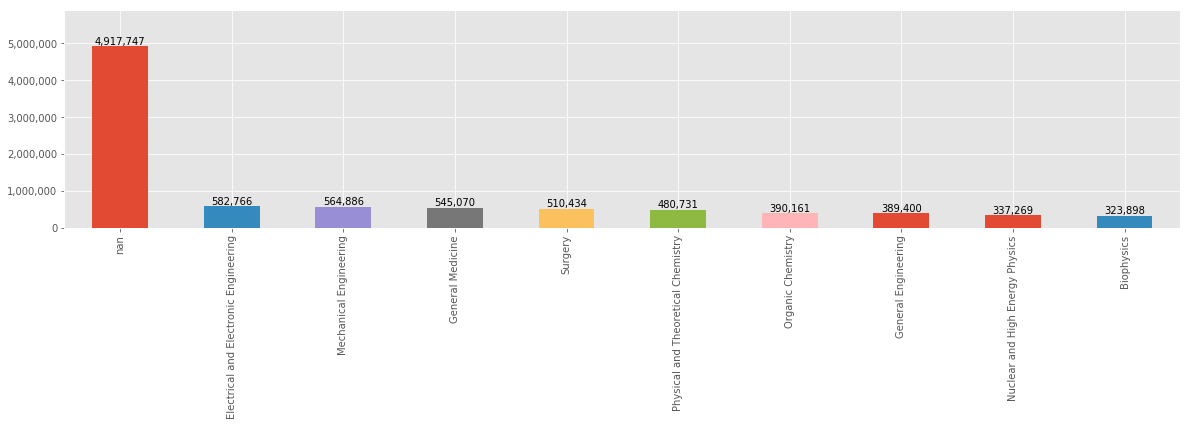

In [19]:
df_temp = (
    df_reference_stat[df_reference_stat['type'] == 'non_oa_ref-first_subject_area']
    .drop('type', axis=1)
    .set_index('key')
)
show_counts(df_temp['count'].head(10), figsize=(20, 4))

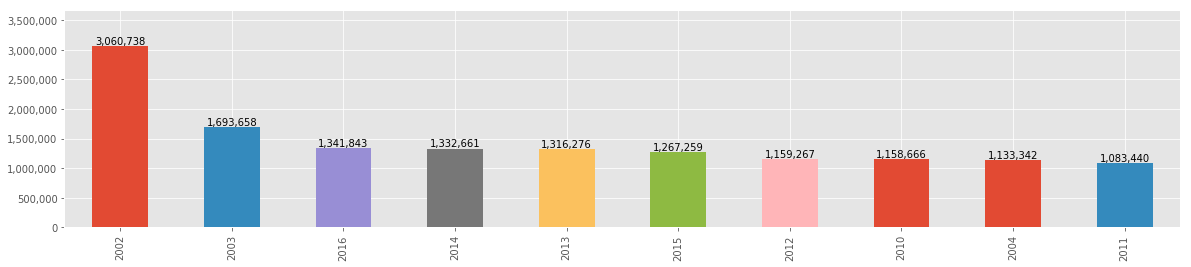

In [20]:
df_temp = (
    df_reference_stat[df_reference_stat['type'] == 'non_oa_ref-created']
    .drop('type', axis=1)
    .set_index('key')
)
show_counts(df_temp['count'].head(10), figsize=(20, 4))

## More detailed analysis on the summaries by type and publisher

In [21]:
df_summary_by_type_and_publisher = pd.read_csv(
    os.path.join(data_path, summary_by_type_and_publisher_stats_filename), sep='\t'
).rename(columns={
    'reference_count': 'reference_count_crossref',
    'num_references': 'reference_count_oa'
})
df_summary_by_type_and_publisher.head(3)

,type,publisher,stat,doi,title,reference_count_crossref,referenced_by_count,created,container_title,author_count,first_subject_area,subject_areas,has_references,reference_count_oa,num_citations_without_doi,num_duplicate_citation_dois,cited_dois
0,NaN,ABCM Associação Brasileira de Engenharia e Ciê...,count,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
1,NaN,ABCM Associação Brasileira de Engenharia e Ciê...,count_non_zero,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN
2,NaN,ABCM Associação Brasileira de Engenharia e Ciê...,count_zero,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,NaN


In [22]:
# get an overview of the work count by type and publisher
df_summary_by_type_and_publisher_work_counts = df_summary_by_type_and_publisher[
    df_summary_by_type_and_publisher['stat'] == 'count'
].groupby(['type', 'publisher']).sum()['doi'].sort_values(ascending=False).to_frame('work_count')
df_summary_by_type_and_publisher_work_counts.head().applymap(format_count)

work_count
type                publisher                     
journal-article     Elsevier BV         15,258,872
                    Wiley-Blackwell      7,559,150
                    Springer Nature      7,147,805
                    Informa UK Limited   3,729,545
proceedings-article IEEE                 2,695,226

In [23]:
# get an overview of the work count by type
(
    df_summary_by_type_and_publisher_work_counts.reset_index().groupby('type')
    .sum().sort_values(by='work_count', ascending=False).head().applymap(format_count)
)

,work_count
type,
journal-article,"69,699,144"
book-chapter,"10,740,759"
proceedings-article,"4,986,867"
component,"2,969,348"
dataset,"1,558,608"


In [24]:
# sanity check, the grouped summary should equal the ungrouped summary
df_summary_by_type_and_publisher_sums = df_summary_by_type_and_publisher[
    df_summary_by_type_and_publisher['stat'] == 'sum'
]
total_reference_count_according_to_crossref = df_summary_by_type_and_publisher_sums['reference_count_crossref'].sum()
assert total_reference_count_according_to_crossref == df_summary['reference_count']['sum']
(
    df_summary_by_type_and_publisher_sums[['reference_count_crossref', 'reference_count_oa']]
    .sum()
    .map(format_count)
    .to_frame('sum')
)

,sum
reference_count_crossref,"1,075,133,743"
reference_count_oa,"523,201,061"


In [25]:
# total references by type
(
    df_summary_by_type_and_publisher_sums.groupby('type')
    [['reference_count_crossref', 'reference_count_oa']]
    .sum()
    .sort_values('reference_count_crossref', ascending=False)
    .head()
    .applymap(format_count)
)

,reference_count_crossref,reference_count_oa
type,,
journal-article,"956,050,193","486,041,671"
book-chapter,"74,215,135","26,574,611"
proceedings-article,"37,417,322","3,519,877"
reference-entry,"6,817,461","6,817,461"
other,"301,840","122,794"


In [26]:
# Publishers with the highest amount of references
(
    df_summary_by_type_and_publisher_sums.groupby('publisher')
    .sum()[['reference_count_crossref', 'reference_count_oa']]
    .sort_values(by='reference_count_crossref', ascending=False)
).head().applymap(format_count)

,reference_count_crossref,reference_count_oa
publisher,,
Elsevier BV,"305,956,704",0
Wiley-Blackwell,"142,826,713","142,487,177"
Springer Nature,"129,136,484","129,101,635"
Informa UK Limited,"68,239,986","67,873,449"
Elsevier,"36,663,689","14,856"


In [27]:
# Elsevier uses mutliple names, treat them as one
elsevier_names = [
    s for s in df_summary_by_type_and_publisher_sums['publisher'].unique()
    if not pd.isnull(s) and 'elsevier' in s.lower()
]
print(elsevier_names)
df_summary_by_type_and_publisher_sums_merged_publisher = (
    df_summary_by_type_and_publisher_sums.replace({
        'publisher': {s: 'Elsevier (all)' for s in elsevier_names}
    })
)

['Elsevier', 'Elsevier IFAC', 'Elsevier, IFAC', 'IFAC, Elsevier', 'Elsevier, Germany', 'Elsevier BV', '"Elsevier",', 'Elsevier Masson', 'Elsevier Pub. Co.', 'Elsevier Pub. Co.,', 'Elsevier,', 'Publishing company "Elsevier,",']


In [28]:
# Publishers with the highest amount of references - this time with merged publisher names
(
    df_summary_by_type_and_publisher_sums_merged_publisher.groupby('publisher')
    .sum()[['reference_count_crossref', 'reference_count_oa']]
    .sort_values(by='reference_count_crossref', ascending=False)
).head().applymap(format_count)

,reference_count_crossref,reference_count_oa
publisher,,
Elsevier (all),"342,620,393","14,856"
Wiley-Blackwell,"142,826,713","142,487,177"
Springer Nature,"129,136,484","129,101,635"
Informa UK Limited,"68,239,986","67,873,449"
IEEE,"30,180,371",0


In [29]:
# Publishers with the highest amount of references (by type) - this time with merged publisher names
(
    df_summary_by_type_and_publisher_sums_merged_publisher.groupby(['type', 'publisher'])
    .sum()[['reference_count_crossref', 'reference_count_oa']]
    .sort_values(by='reference_count_crossref', ascending=False)
).head().applymap(format_count)

reference_count_crossref reference_count_oa
type            publisher                                                     
journal-article Elsevier (all)                  305,956,704                  0
                Wiley-Blackwell                 141,932,333        141,592,797
                Springer Nature                 129,136,484        129,101,635
                Informa UK Limited               68,239,986         67,873,449
book-chapter    Elsevier (all)                   36,663,689             14,856